In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from pyTVDN.TVDNutils import GetBsplineEst
from scipy.signal import detrend
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

In [5]:
fMRI = fMRIs[0, 9]["fMRI"][:90, :]

## 1. Detection after Fourier Regression  with `10` basis

In [31]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", smoothType="fourier",
                     r=6, kappa=1.65, fct=0.5, lamb=1e-4, plotfct=180, downRate=4, nbasis=10,
                     MaxM=10, Lmin=4, freq=0.5, showProgress=True)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': False,
 'kappa': 1.65,
 'lamb': 0.0001,
 'nbasis': 10,
 'plotfct': 180,
 'r': 6}


In [32]:
fMRIdet()

### Tuning the kappa parameters

In [33]:
kappas = np.arange(0.50, 2.5, step=0.01)
fMRIdet.TuningKappa(kappas)

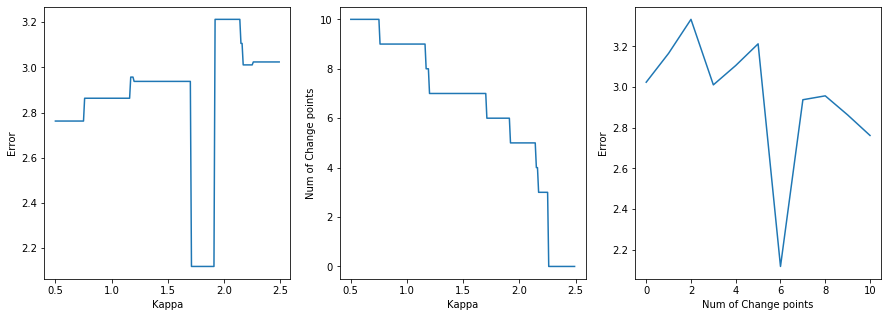

In [34]:
fMRIdet.PlotKappaErrCurve()

### Then we  can check the best kappa parameters w.r.t mean square errors

In [35]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.710000000000001
The optimal number of change point under the range of kappa we speicified is: 6
The optimal number of change point is: 6


### Check the results after updating

In [36]:
fMRIdet.UpdateEcpts(6)
print(fMRIdet)

+-------------+---------------------------------+-------------------+------+
| Num of CPTs |          Estiamted CPTs         |        MSE        | Rank |
+-------------+---------------------------------+-------------------+------+
|      6      | [ 21.  55.  87. 106. 133. 159.] | 2.118324223946853 |  6   |
+-------------+---------------------------------+-------------------+------+


### Plot the reconstructed curve under the optimal kappa


The plot indices are [50, 13, 61, 58, 8].


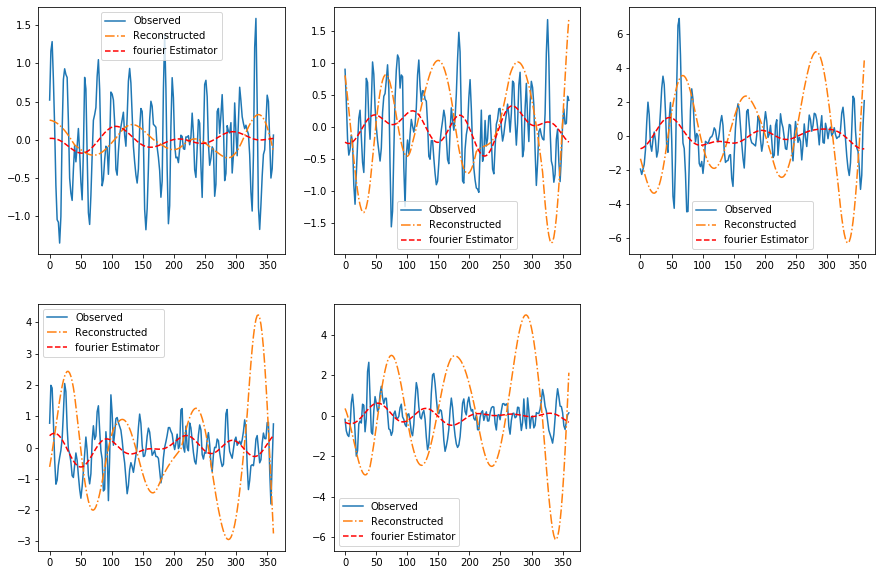

In [38]:
fMRIdet.PlotRecCurve(is_smoothCurve=True, saveFigPath=None)